In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunctionsTilting import * 
from random import uniform
import random
import pickle
import math
import time

In [2]:
'''Making the source out of many different rays on a source '''
def RunSource(Lamd,Nsize,spo,n,r): 
    Rays = makerays(spo,thetG,r,n) #sourcethet as [0,0,0]
    jx,jy = gridlines(7.9375,[160.375,-113],200) #these are now the PIXELS
    Pix = MakePixels(jx,jy) #center of each pixel
    Ij = []
    Delay = []
    for y in np.linspace(-18,18,int(Nsize)):
        PTot=0
        OutRays=RunRaysM(Rays,y) #eight each
        for j in range(len(Pix)): #per PIXEL
            Ex4i = 0 #adding PER PIXEL from parts of RAYS in this PIXEL
            Ey4i = 0 #THIS IS WHERE THEY WILL INTERFERE
            for i in range(len(OutRays)): #per ray IN THIS PIXEL
                I = OutRays[i][1]
                thet = OutRays[i][0]
                phase = np.exp(1j*(OutRays[i][4]*2*np.pi/Lamd)) #factor of 2??
                Ex1 = np.sqrt(I)*np.cos(thet)
                Ey1 = np.sqrt(I)*np.sin(thet)
                Ex = Ex1*phase
                Ey = Ey1*phase
                #doing summation over entire detector
                sig,mux,muy = MakeGaussian(OutRays[i],Lamd)
                Gr = Airygaussian3dNORM(Pix[j][0],Pix[j][1],sig,mux,muy)
                Ex4i = Ex4i + Gr*Ex
                Ey4i = Ey4i + Gr*Ey
            PTot = PTot + (Ex4i*Ex4i.conjugate()).real + (Ey4i*Ey4i.conjugate()).real
        Delay.append(y*0.95630475596*4)
        Ij.append(PTot)
    return Delay,Ij


total time: ~ 3.029495032628377 mins


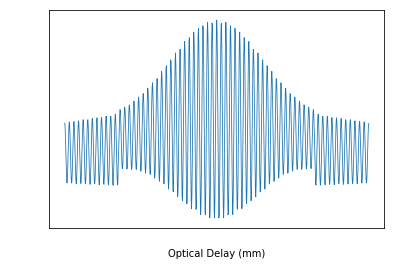

In [3]:
Timei = time.time()
Freq = 144.3
Lamd = 300/Freq
Nsize = Nsized(Lamd)
sp = spab(4,4) #this is the origin of the input focal plane
sourcethet = [0.,0.,0.] #so center angle is vertical
n = 10
r = 0
Delay,Ij = RunSource(Lamd,Nsize,sp,n,r)
#with open("Plots/OneRayI"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Ij,f)
#with open("Plots/OneRayD"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Delay,f)
Timef = time.time()
print('total time: ~',float(Timef-Timei)/60, 'mins')
pl.plot(Delay,Ij,linewidth = .8)
pl.tick_params(colors = 'white')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
pl.show()

total time: ~ 28.330494129657744 mins


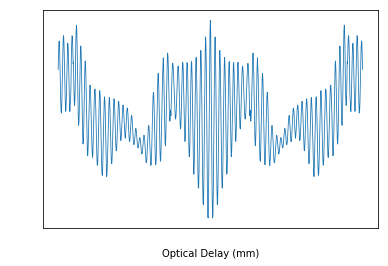

In [4]:
Timei = time.time()
Freq = 144.3
Lamd = 300/Freq
Nsize = Nsized(Lamd)
sp = spab(4,4) #this is the origin of the input focal plane
sourcethet = [0.,0.,0.] #so center angle is vertical
n = 50
r = 7
Delay,Ij = RunSource(Lamd,Nsize,sp,n,r)
#with open("Plots/OneRayI"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Ij,f)
#with open("Plots/OneRayD"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Delay,f)
Timef = time.time()
print('total time: ~',float(Timef-Timei)/60, 'mins')
pl.plot(Delay,Ij,linewidth = .8) 
pl.tick_params(colors = 'white')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
pl.show()

total time: ~ 48.109889213244124 mins


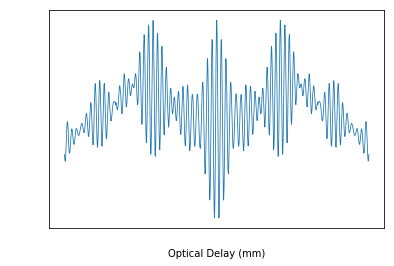

In [7]:
Timei = time.time()
Freq = 144.3
Lamd = 300/Freq
Nsize = Nsized(Lamd)
sp = spab(4,4) #this is the origin of the input focal plane
sourcethet = [0.,0.,0.] #so center angle is vertical
n = 100
r = 5
Delay,Ij = RunSource(Lamd,Nsize,sp,n,r)
#with open("Plots/OneRayI"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Ij,f)
#with open("Plots/OneRayD"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Delay,f)
Timef = time.time()
print('total time: ~',float(Timef-Timei)/60, 'mins')
pl.plot(Delay,Ij,linewidth = .8) 
pl.tick_params(colors = 'white')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
pl.show()